In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd '/content/drive/MyDrive/CV_ENG_8160/module 3'

/content/drive/MyDrive/CV_ENG_8160/module 3


In [3]:
import os
import torch
import pandas as pd
from skimage import io, transform
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils
from pathlib import Path
from PIL import Image
# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

plt.ion()   # interactive mode

In [5]:
class traffic_sign(Dataset):
    def __init__(self, *args):

        # initialize dataset variables here
        print ('initialize')

    def __len__(self):
        # returns the length of the dataset
        return None

    def __getitem__(self, index):

        # preprocess and transformations
        # indexes the dataset such that dataset[i] can retrieve the ith sample.
        return image, label

In [8]:
# traffic_sign_dataset=traffic_sign(root_dir)

In [9]:
# root_dir="data/traffic_signs_class"
# obj=traffic_sign(root_dir)
# for dir in obj.root.iterdir():
#   print(dir)
#   # print(list(dir.glob('*')))

In [10]:
# for idx,sample in enumerate(obj):
#   print(idx,sample)
#   if idx==5:
#     break


In [7]:
class traffic_sign(Dataset):
    def __init__(self, root_dir ):

        # initialize dataset variables here
        # self.root = root_dir
        self.root = Path(root_dir)

        self.df = pd.DataFrame(columns = ['image_names','class_label'])

        for fldr in self.root.iterdir():
          img_names = []
          if fldr.is_dir():
            img_names = img_names + list(fldr.glob('*.ppm'))

          img_names = [i for i in img_names]
          df_cur = pd.DataFrame(img_names,columns = ['image_names'])
          df_cur['class_label'] = fldr.name
          self.df = pd.concat([self.df, df_cur],axis=0)

        self.df = self.df.sample(frac=1)
        self.image_names = list(self.df['image_names'].values)
        self.class_label = list(self.df['class_label'].values)


    def __len__(self):
        # returns the length of the dataset
        return len(self.image_names)

    def __getitem__(self, idx):

        # preprocess and transformations
        # indexes the dataset such that dataset[i] can retrieve the ith sample.
        image = self.image_names[idx]
        image_data = io.imread(image)
        # image_np = Image.fromarray(image_data)

        label = self.class_label[idx]

        sample = {'image': image_data, 'label': label}

        return sample

In [11]:
traffic_sign_dataset = traffic_sign('data/traffic_signs_class')

0 (46, 46, 3) 00040
1 (47, 34, 3) 00033
2 (30, 29, 3) 00034
3 (57, 47, 3) 00033
4 (191, 193, 3) 00014
5 (48, 50, 3) 00013
6 (53, 47, 3) 00034
7 (30, 31, 3) 00034


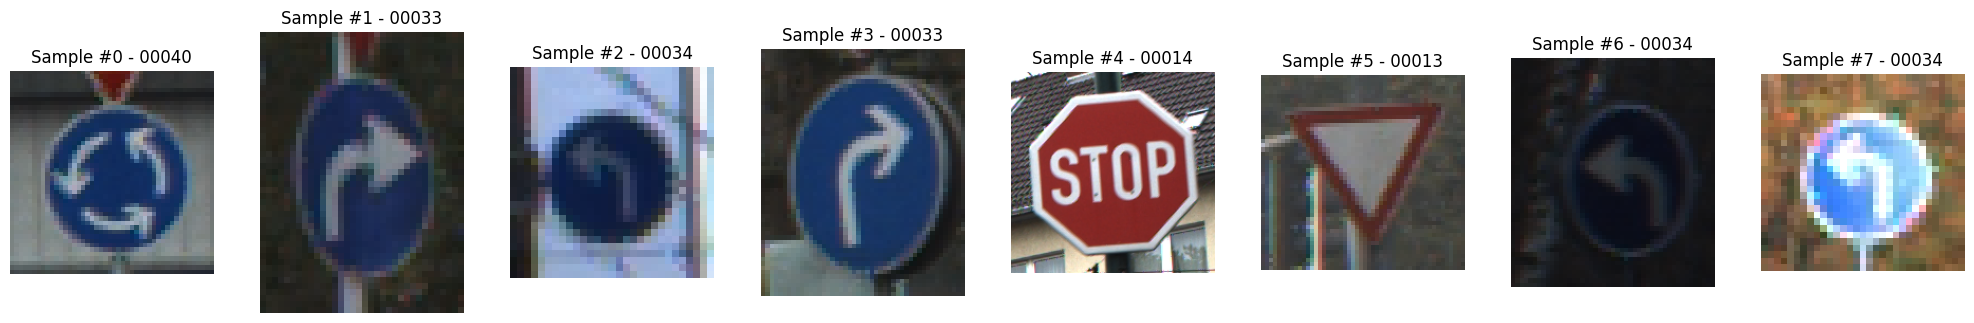

In [12]:
fig = plt.figure(figsize=(20,20))
ncols = 8
for i, sample in enumerate(traffic_sign_dataset):
  print(i, sample['image'].shape, sample['label'])
  ax = plt.subplot(1, ncols, i + 1)
  plt.tight_layout()
  ax.set_title('Sample #{} - {}'.format(i, sample['label']))
  ax.axis('off')
  # show_landmarks(**sample)
  plt.imshow(sample['image'])

  if i == ncols-1:
      plt.show()
      break

In [13]:
output_size=256

In [14]:
## transform data
class Rescale(object):
    """Rescale the image in a sample to a given size.

    Args:
        output_size (tuple or int): Desired output size. If tuple, output is
            matched to output_size. If int, smaller of image edges is matched
            to output_size keeping aspect ratio the same.
    """

    def __init__(self, output_size):
        assert isinstance(output_size, (int, tuple)) #assert checks if a certain condition is met
        self.output_size = output_size

    def __call__(self, sample):
        image, labels = sample['image'], sample['label']
        print(sample['image'])
        h, w = image.shape[:2]

        if isinstance(self.output_size, int):
            if h > w:
                new_h, new_w = self.output_size * h / w, self.output_size
            else:
                new_h, new_w = self.output_size, self.output_size * w / h
        else:
            new_h, new_w = self.output_size

        new_h, new_w = int(new_h), int(new_w)

        img = transform.resize(image, (new_h, new_w))

        return {'image': img, 'label': labels}

[[[ 32  28  25]
  [ 35  32  28]
  [ 33  31  27]
  ...
  [158 101  53]
  [155 102  54]
  [138  88  39]]

 [[ 32  28  26]
  [ 32  29  28]
  [ 33  30  27]
  ...
  [207 154 106]
  [135  99  50]
  [ 89  71  18]]

 [[ 33  28  25]
  [ 30  26  23]
  [ 32  28  23]
  ...
  [155 105  56]
  [114  96  44]
  [103 116  64]]

 ...

 [[ 34  32  26]
  [ 40  35  27]
  [ 39  30  23]
  ...
  [222 221 218]
  [137 139 150]
  [106 112 114]]

 [[ 28  28  22]
  [ 38  36  27]
  [ 32  29  21]
  ...
  [223 219 214]
  [138 138 153]
  [108 113 117]]

 [[ 32  33  21]
  [ 36  37  24]
  [ 40  42  23]
  ...
  [214 206 189]
  [140 138 145]
  [107 111 110]]]


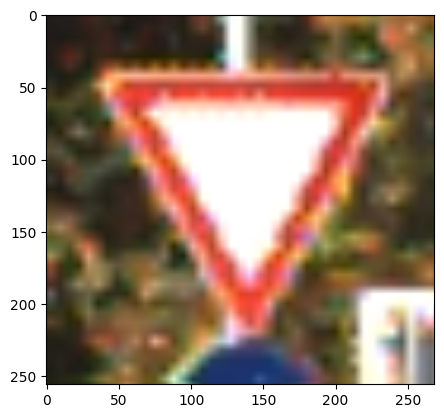

In [15]:
scale=Rescale(256)
out_img = scale(traffic_sign_dataset[500])
plt.imshow(out_img['image'])

[[[ 32  28  25]
  [ 35  32  28]
  [ 33  31  27]
  ...
  [158 101  53]
  [155 102  54]
  [138  88  39]]

 [[ 32  28  26]
  [ 32  29  28]
  [ 33  30  27]
  ...
  [207 154 106]
  [135  99  50]
  [ 89  71  18]]

 [[ 33  28  25]
  [ 30  26  23]
  [ 32  28  23]
  ...
  [155 105  56]
  [114  96  44]
  [103 116  64]]

 ...

 [[ 34  32  26]
  [ 40  35  27]
  [ 39  30  23]
  ...
  [222 221 218]
  [137 139 150]
  [106 112 114]]

 [[ 28  28  22]
  [ 38  36  27]
  [ 32  29  21]
  ...
  [223 219 214]
  [138 138 153]
  [108 113 117]]

 [[ 32  33  21]
  [ 36  37  24]
  [ 40  42  23]
  ...
  [214 206 189]
  [140 138 145]
  [107 111 110]]]


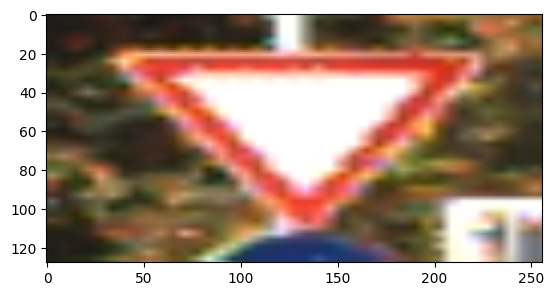

In [17]:
scale=Rescale((128,256))
out_img = scale(traffic_sign_dataset[500])
plt.imshow(out_img['image'])

In [ ]:
# import time
# composed = transforms.Compose([Rescale(256), Flip(0)])
# for i,trnsfm in enumerate([Flip(1), Rescale(128),composed]):
#   print (type(trnsfm).__name__)
#   # print (trnsfm(traffic_sign_dataset[500]))

#   ax = plt.subplot(1, 3, i + 1)
#   plt.imshow(trnsfm(traffic_sign_dataset[500])['image'])
#   plt.tight_layout()
#   ax.set_title(type(trnsfm).__name__)

In [18]:
## write a class to flip the image from left  to right

# np.flip(image,0) #horizontal flip
# np.flip(image,1) #v flip
# #


class flip(object):
    def __init__(self, flip_type):
      assert isinstance(flip_type, int) #assert checks if a certain condition is met
      self.flip_type = flip_type

    def __call__(self, sample):
        image, labels = sample['image'], sample['label']
        image = np.flip(image,self.flip_type)

        sample = {'img': image, 'label': labels}
        return sample




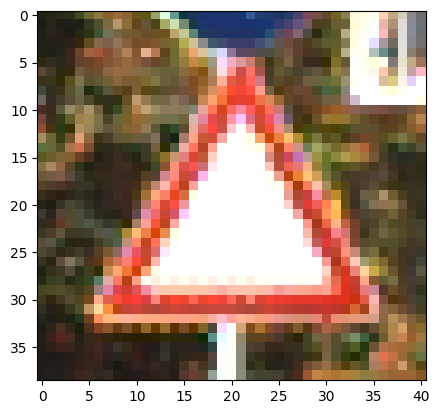

In [19]:
obj = flip(flip_type=0)
out_img = obj(traffic_sign_dataset[500])
plt.imshow(out_img['img'])


In [26]:
## write a class to convert image to tensor

class ToTensor(object):
    def __call__(self, sample):
        image, labels = sample['image'], sample['label']
        image = torch.from_numpy(image)
        sample = {'image': image, 'label': labels}
        return sample

In [27]:
obj = ToTensor()
img_tensor = obj(traffic_sign_dataset[500])
img_tensor


{'image': tensor([[[ 32,  28,  25],
          [ 35,  32,  28],
          [ 33,  31,  27],
          ...,
          [158, 101,  53],
          [155, 102,  54],
          [138,  88,  39]],
 
         [[ 32,  28,  26],
          [ 32,  29,  28],
          [ 33,  30,  27],
          ...,
          [207, 154, 106],
          [135,  99,  50],
          [ 89,  71,  18]],
 
         [[ 33,  28,  25],
          [ 30,  26,  23],
          [ 32,  28,  23],
          ...,
          [155, 105,  56],
          [114,  96,  44],
          [103, 116,  64]],
 
         ...,
 
         [[ 34,  32,  26],
          [ 40,  35,  27],
          [ 39,  30,  23],
          ...,
          [222, 221, 218],
          [137, 139, 150],
          [106, 112, 114]],
 
         [[ 28,  28,  22],
          [ 38,  36,  27],
          [ 32,  29,  21],
          ...,
          [223, 219, 214],
          [138, 138, 153],
          [108, 113, 117]],
 
         [[ 32,  33,  21],
          [ 36,  37,  24],
          [ 40,  42, 

In [ ]:
class TrafficSignDataset(Dataset):
    def __init__(self, root_dir, transform=None):

        # initialize dataset variables here
        # self.root = root_dir
        self.root = Path(root_dir)
        self.transform = transform

        self.df = pd.DataFrame(columns = ['image_names','class_label'])

        for fldr in self.root.iterdir():
          img_names = []
          if fldr.is_dir():
            img_names = img_names + list(fldr.glob('*.ppm'))

          img_names = [i for i in img_names]
          df_cur = pd.DataFrame(img_names,columns = ['image_names'])
          df_cur['class_label'] = fldr.name
          self.df = pd.concat([self.df, df_cur],axis=0)

        self.df = self.df.sample(frac=1)
        self.image_names = list(self.df['image_names'].values)
        self.class_label = list(self.df['class_label'].values)


    def __len__(self):
        # returns the length of the dataset
        return len(self.image_names)

    def __getitem__(self, idx):

        # preprocess and transformations
        # indexes the dataset such that dataset[i] can retrieve the ith sample.
        image = self.image_names[idx]
        image_data = io.imread(image)
        # image_np = Image.fromarray(image_data)

        label = self.class_label[idx]

        sample = {'image': image_data, 'label': label}

        if self.transform:
            sample = self.transform(sample)

        return sample

In [ ]:
compose_transforms = transforms.Compose([Rescale((256,256)), Flip(0)])
traffic_obj = TrafficSignDataset('data/traffic_signs_class',transform=compose_transforms)

In [ ]:
for i,ts in enumerate(traffic_obj):
  print (ts['image'].shape)
  if i == 5:
    break

(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
